#Dicoding NLP Submission
Nama : Immanuel Mayerd


##Membaca dan Memvisualisasikan persebaran Data

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#Install package kaggle
!pip install -q kaggle


In [3]:
#Membuat fungsi upload credential kaggle
def upload_kaggle_credentials():
    from google.colab import files
    uploaded = files.upload()

    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !ls ~/.kaggle

In [4]:
#Mendownload dataset BBC News yang telah disimpan di akun kaggle pribadi
upload_kaggle_credentials()
!kaggle datasets download -d immanuelmayerd/bbc-news

Saving kaggle.json to kaggle.json
kaggle.json
100% 1.83M/1.83M [00:01<00:00, 1.88MB/s]
100% 1.83M/1.83M [00:01<00:00, 1.65MB/s]


In [5]:
# Mengekstrak dataset
!mkdir bbc-news
!unzip bbc-news.zip -d bbc-news
!ls bbc-news

Archive:  bbc-news.zip
  inflating: bbc-news/BBC News.csv   
'BBC News.csv'


In [6]:
#Membuat dataframe dengan nama df_tc
data_path = "/content/bbc-news/BBC News.csv"
df_tc = pd.read_csv(data_path, sep=",")

In [7]:
#Menampilkan head df_tc
df_tc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [8]:
#Mengecek ukuran dataset
df_tc.shape

(2225, 2)

In [9]:
#Mengecek apakah ada nilai Null
df_tc.isnull().sum()

category    0
text        0
dtype: int64

In [10]:
#Mengecek memory usage
print(df_tc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None


In [11]:
#Mengecek nilai unik yang akan dijadikan label
print(df_tc['category'].unique())


['tech' 'business' 'sport' 'entertainment' 'politics']


<Axes: xlabel='category', ylabel='count'>

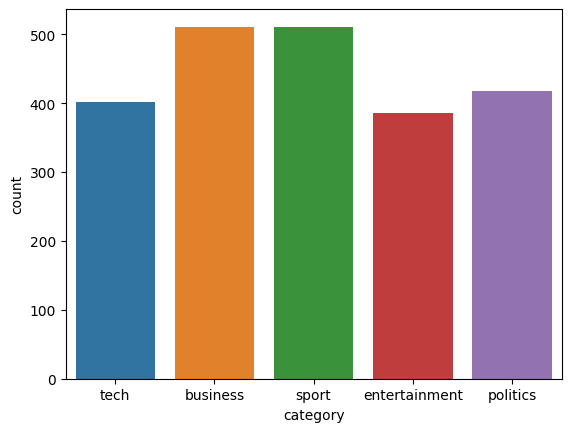

In [12]:
#Memvisualisasikan persebaran data berdasarkan category
sns.countplot(x=df_tc['category'])


##Preprocessing Data

In [13]:
#Membuat fungsi cleaning data dengan stopwords
def cleaning(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text

In [14]:
#Membuat kolom baru berdasarkan raw data yang dibersihkan dengan fungsi cleaning
df_tc['Filtered'] = df_tc['text'].apply(cleaning)

In [15]:
#Mengecek data hasil cleaning
df_tc

,category,text,Filtered
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy exchatshow h...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


##Enconding dan Finalisasi dataframe

In [17]:
#Melakukan Encoding label menjadi 0 dan 1
category = pd.get_dummies(df_tc['category'])
new_df = pd.concat([df_tc, category], axis=1)
new_df = new_df.drop(columns=['category','text'])
new_df.head(10)

,Filtered,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books alone former worldcom...,1,0,0,0,0
2,tigers wary farrell gamble leicester say rushe...,0,0,0,1,0
3,yeading face newcastle fa cup premiership side...,0,0,0,1,0
4,ocean twelve raids box office ocean twelve cri...,0,1,0,0,0
5,howard hits back mongrel jibe michael howard s...,0,0,1,0,0
6,blair prepares name poll date tony blair likel...,0,0,1,0,0
7,henman hopes ended dubai third seed tim henman...,0,0,0,1,0
8,wilkinson fit face edinburgh england captain j...,0,0,0,1,0
9,last star wars children sixth final star wars ...,0,1,0,0,0


In [18]:
#Mengecek shape dataframe baru
new_df.shape

(2225, 6)

In [19]:
#Memisahkan label dengan data yang akan dilatih
value = new_df['Filtered'].values
label = new_df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

## Pemodelan Sequential dengan LSTM

In [20]:
#Membagi data train dan test menggunakan sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(value,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=5)

In [21]:
#Import Library untuk NLP
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [22]:
#Melakukan Tokenizer
vocab_size = 10000
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
pad_train = pad_sequences(sequences_train, maxlen=max_len, truncating=trunc_type)
pad_test = pad_sequences(sequences_test, maxlen=max_len, truncating=trunc_type)

print(pad_test.shape)

(445, 200)


In [25]:
#Mengecek bentuk akhir data
pad_train

array([[1579,  948, 1978, ...,  190,  153, 6016],
       [   0,    0,    0, ...,  328, 4204, 6019],
       [   0,    0,    0, ..., 1745, 1113,    1],
       ...,
       [ 302,  442, 2930, ..., 2027,    6,   67],
       [ 752,   59,  674, ...,  706,   84, 6686],
       [   0,    0,    0, ..., 4509,  669, 1337]], dtype=int32)

In [26]:
#Mengecek bentuk akhir data
pad_test

array([[   0,    0,    0, ...,  155,    1, 3630],
       [   0,    0,    0, ...,  102,   79, 8415],
       [   0,    0,    0, ...,   81,   56, 1179],
       ...,
       [   0,    0,    0, ...,  931, 1622,  471],
       [ 331, 4924,    1, ..., 1036, 3894, 1412],
       [5918, 1091,    1, ...,   54,    1, 1430]], dtype=int32)

In [27]:
#Membangun model sequential dengan embedding dan LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 677509 (2.58 MB)
Trainable params: 677509 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#Membuat funsi callback berdasarkan akurasi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\n Akurasi telah terpenuhi!")
callbacks = myCallback()

In [29]:
#Melakukan latih model yang disimpan dalam variabel history
num_epochs = 25
history = model.fit(pad_train, y_train, epochs=num_epochs,
                    validation_data=(pad_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/25
56/56 - 15s - loss: 1.5625 - accuracy: 0.2961 - val_loss: 1.3351 - val_accuracy: 0.4764 - 15s/epoch - 270ms/step
Epoch 2/25
56/56 - 9s - loss: 1.0794 - accuracy: 0.4579 - val_loss: 0.8896 - val_accuracy: 0.5640 - 9s/epoch - 160ms/step
Epoch 3/25
56/56 - 6s - loss: 0.7664 - accuracy: 0.6938 - val_loss: 0.7019 - val_accuracy: 0.6584 - 6s/epoch - 111ms/step
Epoch 4/25
56/56 - 5s - loss: 0.5487 - accuracy: 0.8208 - val_loss: 0.4737 - val_accuracy: 0.8764 - 5s/epoch - 85ms/step
Epoch 5/25

 Akurasi telah terpenuhi!
56/56 - 6s - loss: 0.1945 - accuracy: 0.9506 - val_loss: 0.2573 - val_accuracy: 0.9236 - 6s/epoch - 102ms/step


##Plot akurasi dan loss hasil Pelatihan

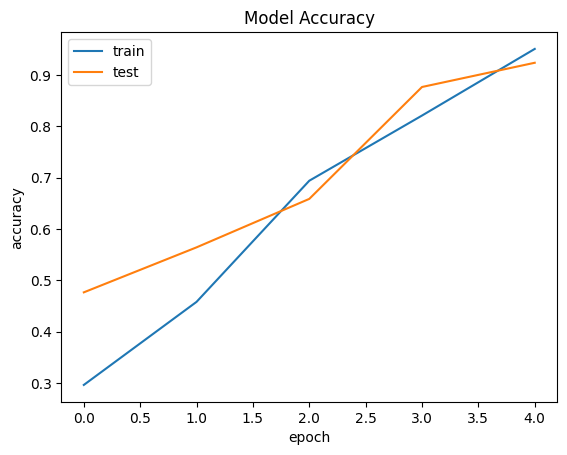

In [30]:
# plot of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

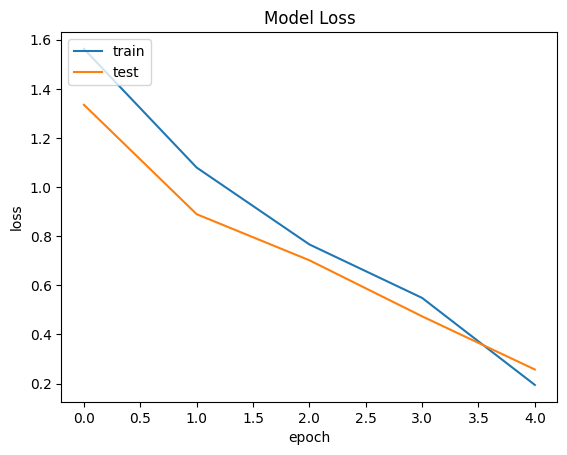

In [31]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()